# 2 - PCA Math, Change of Coordinates

This notebook shows the calculation of the principal components using a toy dataset consisting on a 3D function. The data was selected to show the coordinate transformation done by the method.

Key points:
* Create and plot a function in 3 dimensions $z=f(x,y)$
* Show the PCA algorithm and run it over $f$ to reduce its dimensionality from 3 to 2

## Import libraries

In [1]:
# To have interactive plots
%matplotlib notebook 

# To have static plots
# %matplotlib inline

import numpy
import pandas
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

numpy.set_printoptions( precision=4, suppress=True )

## Read data

In order to show the method, we will use a function in space, defined by a table with 3 columns: $x$, $y$ and $z$.

Our objective is to use Principal Component Analysis to:
* Verify the true dimensionality of the data
* Project the data into a new set of axes, so that it is constrained to 2 dimensions

The data is stored in a file named `sin3d_a.csv`.

In [2]:
points3d = pandas.read_csv( '../data/sin3d_a.csv').values.T

# Alternatively, you can use the file sin3d_b.csv, which yields different results

## Plot 3D

The following plot can be rotated interactively. It is possible to see that the function is located in a plane, but not aligned to any of the main planes in the coordinate system: $xy$ , $xz$ , $yz$

<IPython.core.display.Javascript object>


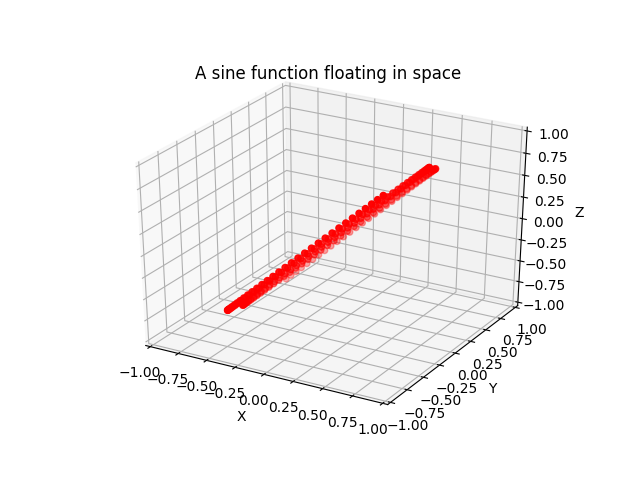

In [3]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

x = points3d[0]
y = points3d[1]
z = points3d[2]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim( (-1,1) )
ax.set_ylim( (-1,1) )
ax.set_zlim( (-1,1) )


pyplot.title( 'A sine function floating in space' )

pyplot.show()

Our objective is to analyse the `point3d` data table using PCA and reduce its dimensions to 2, representing the plane where the curve is located.

## Principal Component Analysis

### Algorithm

The following workflow defines a PCA:
1. Calculate the covariance matrix: $\mathbf{S}=cov(\mathbf{x})$
1. Calculate the eigenvalues and eigenvectors of $\mathbf{S}$: $\mathbf{\lambda}$, $\mathbf{v}$
1. Transform the original data to the new coordinate system.

The library `numpy` has convenient functions to calculate the covariance matrix and the eigenvalues and eigenvectors, as follows:

In [4]:
covariance_matrix = numpy.cov( points3d )
print( covariance_matrix )

[[0.1183 0.0539 0.1577]
 [0.0539 0.4735 0.0719]
 [0.1577 0.0719 0.2103]]


In [5]:
eigenvalues , eigenvectors = numpy.linalg.eig( covariance_matrix )

idx = numpy.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:,idx]
eigenvalues = eigenvalues[idx]

explained_variance_ratio = eigenvalues/eigenvalues.sum()
explained_variance_ratio

print( '*'*50 )
print( 'Eigenvalues (Explained variance)' )
print( eigenvalues )
print( '*'*50 )
print( 'Ratio of the explained variance' )
print( explained_variance_ratio )
print( '*'*50 )
print( 'Eigenvectors (Principal Components)' )
print( eigenvectors )
print( '*'*50 )



**************************************************
Eigenvalues (Explained variance)
[0.5165 0.2855 0.    ]
**************************************************
Ratio of the explained variance
[0.644 0.356 0.   ]
**************************************************
Eigenvectors (Principal Components)
[[-0.2589 -0.5413  0.8   ]
 [-0.9021  0.4315  0.    ]
 [-0.3452 -0.7217 -0.6   ]]
**************************************************


The eigenvectors define a new coordinate system, that takes into account the variance of the complete original dataset.

The data remain the same, we just look at it from another point of view.

The next plot is the same that was shown before, but it includes the eigenvectors in blue. They are orthogonal between them, and the first two align with the data in the direction of biggest variance.

<IPython.core.display.Javascript object>


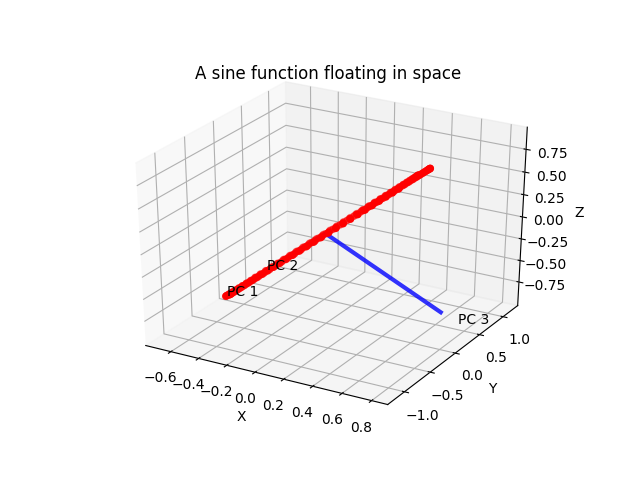

In [6]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

x = points3d[0]
y = points3d[1]
z = points3d[2]

ax.scatter(x, y, z, c='r', marker='o')

for i, v in enumerate( eigenvectors.T):
    ax.plot([0, v[0]], [0, v[1]], [0, v[2]], color='blue', alpha=0.8, lw=3)
    ax.text( v[0]*1.15, v[1]*1.15, v[2]*1.15, 'PC '+str(i+1) )


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

pyplot.title( 'A sine function floating in space' )

pyplot.show()

In the previous graph, the data and the original axes are still present. 

Note that we can define each point in terms of $PC 1$, $PC 2$ and $PC 3$.

Note also that $PC 1$, $PC 2$ and $PC 3$ do not *mean* anything in terms of the original axes. They are a combination of them, but hold no meaning by themselves.

### Scree plot

<img src='../img/800px-Yamnuska_bottom_cliff.jpg' width='300'>

***Scree*** is the name of the accumulated rocks and soil fallen by the sides of mountains and cliffs.

Scree plots often draw a similar curve.

(Image by Wikipedia)

A scree plot is used in PCA to search for the number of components that explain most of the variance. 

It is a plot of the *eigenvalues* (sorted), and thus decreases to the right, resembling a downhill scree.

In the following plot:
* The black bars are the relative contribution of each component to explain the variance
* In red we see the cummulative values of the black bars: How much can explain these components the original data?
* In blue the actual scree plot: The decreasing eigenvalues

<IPython.core.display.Javascript object>


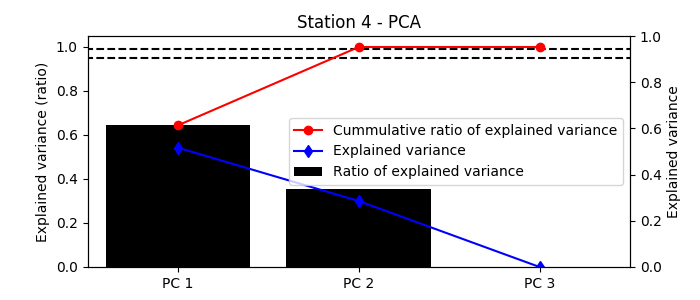

In [10]:
fig, ax = pyplot.subplots( nrows=1, ncols=1, figsize=(7,3) )

ax.bar( list( range( 3 )), explained_variance_ratio, color='black' )
ax.plot( list( range( 3 )), explained_variance_ratio.cumsum(), '-', marker='o', color='red' )
ax.hlines( 0.95, -1, 7, linestyle='--', color='black' )
ax.hlines( 0.99, -1, 7, linestyle='--', color='black' )

axR = ax.twinx()
axR.yaxis.tick_right()
axR.bar( [-1], [0], color='black', label='Ratio of explained variance' )
axR.plot( [-1], [0], '-', marker='o', color='red', label='Cummulative ratio of explained variance' )
axR.plot( list( range( 3 )), eigenvalues, '-', marker='d', color='blue', label='Explained variance' )
axR.set_ylim( [0,1] )

ax.set_xticks( list( range( 3 )) )
ax.set_xticklabels( [ 'PC '+str(i+1) for i in range(3) ] )

ax.set_ylabel( 'Explained variance (ratio)' )
axR.set_ylabel( 'Explained variance' )

axR.legend( loc='center right' )

ax.set_xlim( [-0.5, 2.5] )
pyplot.title( 'Station 4 - PCA' )
#pyplot.savefig( './scree/Station ' + str(station_n) + '_scree.png' )

pyplot.show()

### Data transformation

Once we found the eigenvectors, we can transform the data to a new coordinate system.

Notice that the last eigenvalue is 0. We expect the transformed data to have the same dimensions (3), but very small values in the last one. We can then decide to take just the first 2.

In [ ]:
projected_data = numpy.dot( points3d.T, eigenvectors ).T
#projected_data.T # uncomment to show the numerical result

### Plot of the projected data

In [ ]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

x = projected_data[0]
y = projected_data[1]
z = projected_data[2]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

ax.set_xlim( [-1,1] )
ax.set_ylim( [-1,1] )
ax.set_zlim( [-1,1] )

pyplot.title( 'A sine function with other coordinates, still floating in space' )

pyplot.show()

If we take the fist two columns of this transformed data, we get our function with all information in it, in only 2 dimensions>

In [ ]:
fig, ax = pyplot.subplots( figsize=(5,5) )

ax.scatter( projected_data[0], projected_data[1] )

ax.set_xlabel( 'PC1' )
ax.set_ylabel( 'PC2' )

pyplot.show()
